# 0.0. INTRODUCAO

## 0.1. BIBLIOTECAS

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## 0.2. FUNCOES DE AUXILIARES

## 0.3. CARREGAMENTO DOS DADOS

In [2]:
df = pd.read_csv( 'train.csv' )
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0. DESCRICAO DOS DADOS

In [3]:
df1 = df.copy()

## 1.1. DIMENSAO DOS DADOS

In [4]:
print( 'Numero de linhas:  {}'.format( df1.shape[0] ) )
print( 'Numero de colunas: {}'.format( df1.shape[1] ) )

Numero de linhas:  381109
Numero de colunas: 12


## 1.2. TIPOS DE DADOS

In [5]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## 1.3 CHECK NA

In [6]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 1.4. ESTATISTICA DESCRITIVA

In [7]:
num_atributos = df1.select_dtypes( include = ['int64', 'float64'] )
cat_atributos = df1.select_dtypes( exclude = ['int64', 'float64'] )

### 1.4.1. ATRIBUTOS NUMERCOS

In [8]:
# tendencia central - mean, median
tc1 = pd.DataFrame( num_atributos.apply( np.mean ) ).T
tc2 = pd.DataFrame( num_atributos.apply( np.median ) ).T

# dispersao - max, min, range, std, skew, kurtosis
d1 = pd.DataFrame( num_atributos.apply( max ) ).T
d2 = pd.DataFrame( num_atributos.apply( min ) ).T
d3 = pd.DataFrame( num_atributos.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_atributos.apply( np.std ) ).T
d5 = pd.DataFrame( num_atributos.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_atributos.apply( lambda x: x.kurtosis() ) ).T

#concat

m = pd.concat( [ d2, d1, d3, tc1, tc2, d4, d5, d6 ] ).T.reset_index()
m.columns = ['atributos', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,atributos,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,Age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,Driving_License,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,Region_Code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,Previously_Insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,Annual_Premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,Policy_Sales_Channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,Vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,Response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


### 1.4.2. ATRIBUTOS CATEGORICOS

In [9]:
cat_atributos.apply( lambda x: x.unique().shape[0] )

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

# 2.0. FEATURE ENGENEERING

In [10]:
df2 = df1.copy()

## 2.1. HIPOTESES DE GENERO

- 1 Deveria existir mais clientes do genero masculino com seguro de veículo do que do genero feminino
- 2 Clientes do genero feminino devem possuir carros mais novos
- 3 Clientes do genero masculino devem possuir 70% dos veículos que já se envolveram em acidentes
- 4 Clientes do sexo feminino deveriam ter mais interesse em adquirir o seguro do que cliente do sexo masculino
- 5 Clientes do sexo masculino precisam pagar 10% a mais de premio anual do que clientes do sexo feminino

## 2.2. HIPOTESES DE IDADE

- 6 O numero de cliente que possue seguro é 20% menor entre os mais jovens (35 ano ou menos) em relação aos clientes mais velhos
- 7 Clientes mais velhos (35 anos ou mais) devem possuir carros mais novos do que cliente mais jovens
- 8 Clientes com 35 anos ou menos deveriam se envolver em 90% dos acidentes.
- 9 Cliente mais velhos devem ter 10% mais interesse em adquirir o seguro do que clientes mais jovens

## 2.3. HIPOTESES OUTRAS

- 10 Clientes que já possuem seguro, não têm interesse em adquirir outro seguro
- 11 Clientes a menos tempo como cliente, possuem 20% mais interesse em adquirir o seguro
- 12 Clientes com Veiculos mais novos possuem mais interesse em adquirir o seguro

## 2.4. FEATURE ENGENEERING

In [66]:
#feature insured
df2['Insured'] = df2['Previously_Insured'].apply( lambda x: 'yes' if x == 1 else
                                                            'no')

#feature age_vehicle
df2['Age_Vehicle'] = df2['Vehicle_Age'].apply( lambda x: 'old' if x == '> 2 Years' else
                                                         'used car' if x == '1-2 Year' else
                                                         'new')


# 3.0. ANALISE EXPLORATORIA

In [68]:
df3 = df2.copy()

## 3.1. ANALISE UNIVARIADA

### 3.1.1. VARIAVEL NUMERICA

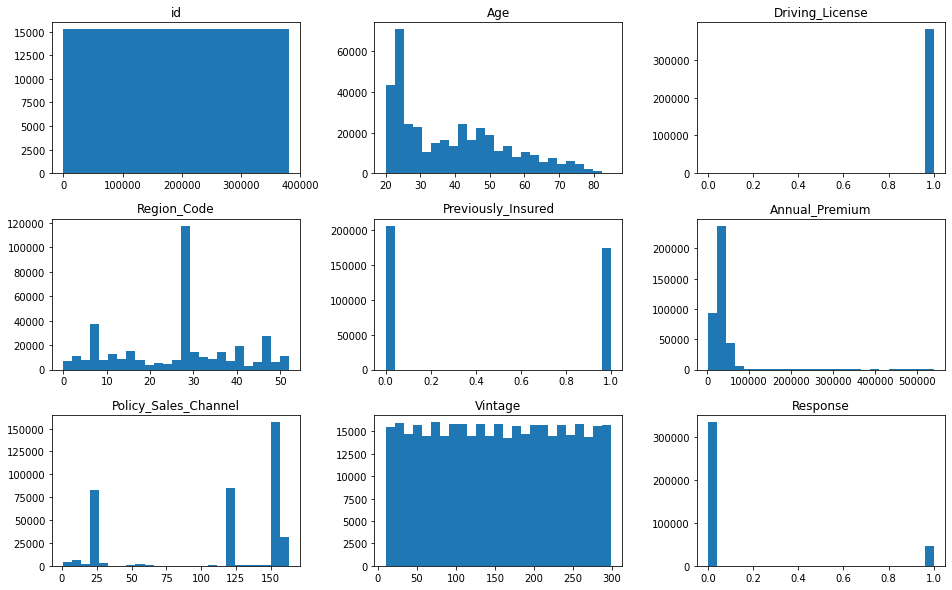

In [41]:
num_atributos.hist( grid = False, figsize = (16, 10), bins = 25 );

### 3.1.2. VARIAVEL CATEGORICA

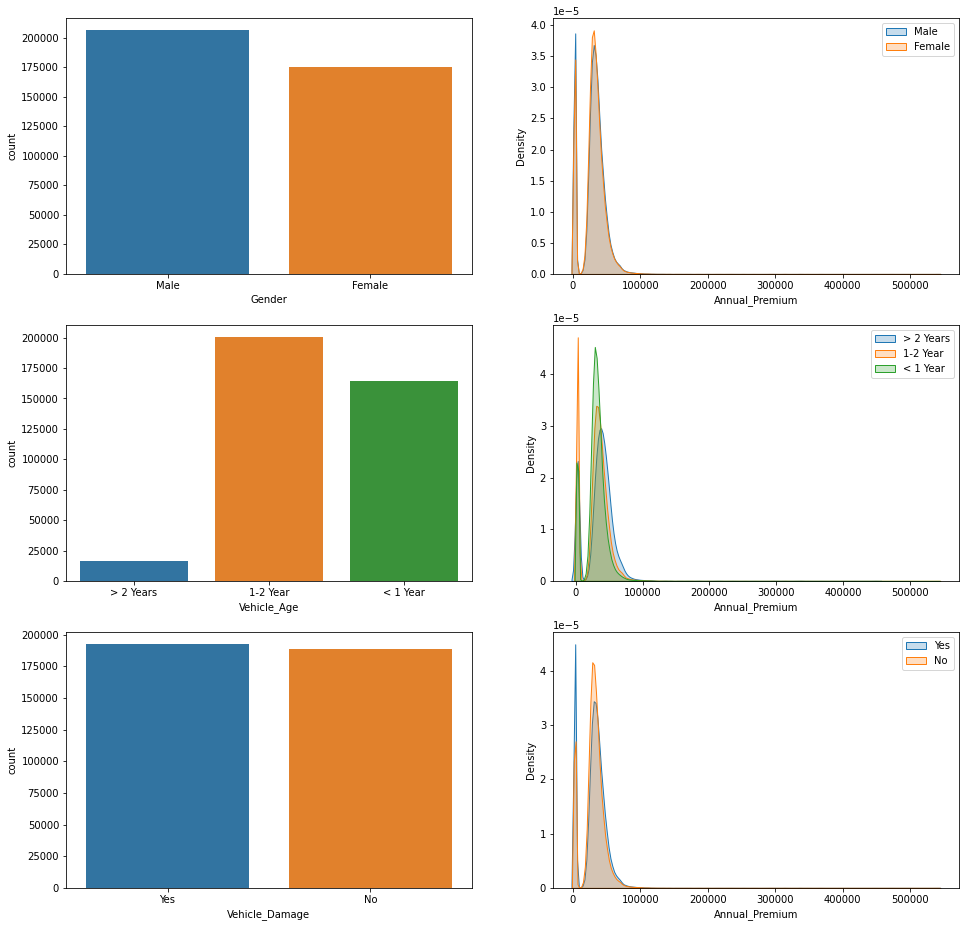

In [42]:
plt.figure( figsize = ( 16, 16 ) )
plt.subplot( 3, 2, 1 )
sns.countplot( df3['Gender'] );

plt.subplot( 3, 2, 2 )
sns.kdeplot( df3[df3['Gender'] == 'Male']['Annual_Premium'], shade = True )
sns.kdeplot( df3[df3['Gender'] == 'Female']['Annual_Premium'], shade = True )
plt.legend( labels = ['Male', 'Female'] );

plt.subplot( 3, 2, 3 )
sns.countplot( df3['Vehicle_Age'] );

plt.subplot( 3, 2, 4 )
sns.kdeplot( df3[df3['Vehicle_Age'] == '> 2 Years']['Annual_Premium'], shade = True )
sns.kdeplot( df3[df3['Vehicle_Age'] == '1-2 Year']['Annual_Premium'], shade = True )
sns.kdeplot( df3[df3['Vehicle_Age'] == '< 1 Year']['Annual_Premium'], shade = True )
plt.legend( labels = ['> 2 Years', '1-2 Year', '< 1 Year'] );

plt.subplot( 3, 2, 5 )
sns.countplot( df3['Vehicle_Damage'] );

plt.subplot( 3, 2, 6 )
sns.kdeplot( df3[df3['Vehicle_Damage'] == 'Yes']['Annual_Premium'], shade = True )
sns.kdeplot( df3[df3['Vehicle_Damage'] == 'No']['Annual_Premium'], shade = True )
plt.legend( labels = ['Yes', 'No'] );

## 3.2. ANALISE BIVARIADA

### 3.2.1. 1) Deveria existir mais clientes do genero masculino com seguro de veículo do que do genero feminino

**Falso.** Apesar de representarem 45,9% dos clientes, clientes do sexo feminino representam 50,3% dos clientes que já possuem seguro.

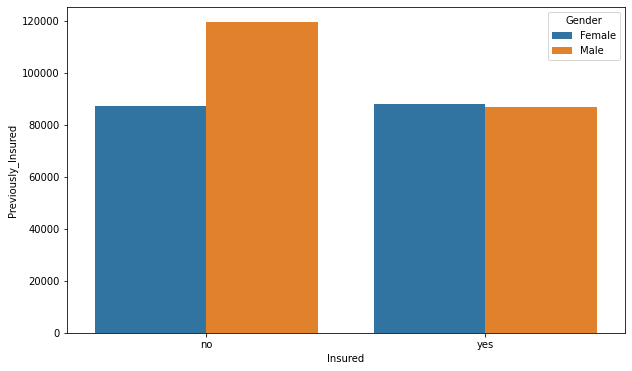

In [43]:
aux1 = df3[['Gender', 'Previously_Insured', 'Insured']].groupby( ['Insured', 'Gender'] ).count().reset_index()

plt.figure( figsize = ( 10,6 ) )
sns.barplot( x = 'Insured', y = 'Previously_Insured', hue = 'Gender', data = aux1 );

### 3.2.2. 2) Clientes do genero feminino devem possuir carros mais novos
**Verdadeiro.** Mulher têm mais preferência por carros novos e homens por carros usados

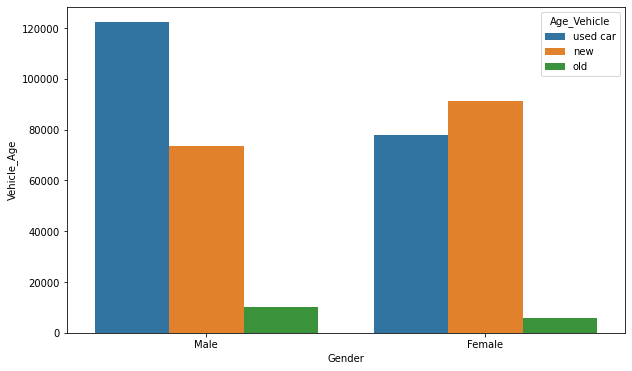

In [57]:
aux2 = df3[['Gender', 'Vehicle_Age', 'Age_Vehicle']].groupby( ['Gender', 'Age_Vehicle'] ).count().reset_index().sort_values( 'Vehicle_Age', ascending = False)

plt.figure( figsize = ( 10,6 ) )
sns.barplot( x = 'Gender', y = 'Vehicle_Age', hue = 'Age_Vehicle', data = aux2 );

### 3.2.3. 3) Clientes do genero masculino devem possuir 70% dos veículos que já se envolveram em acidentes
**Verdadeiro.** Homens possuem 58.6% dos veículos que já se envolveram em acidentes

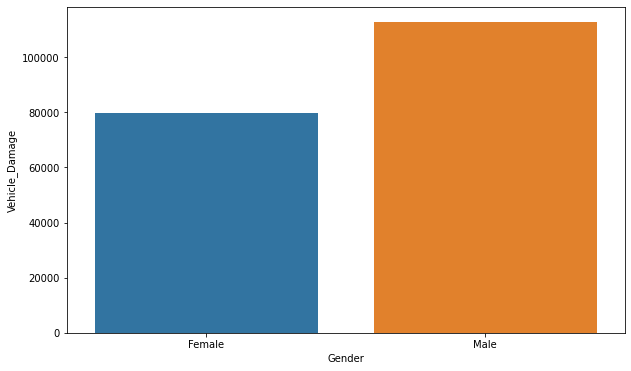

In [74]:
aux = df3[df3['Vehicle_Damage'] == 'Yes']
aux3 = aux[['Gender', 'Vehicle_Damage']].groupby( 'Gender' ).count().reset_index()

plt.figure( figsize = ( 10,6 ) )
sns.barplot( x = 'Gender', y = 'Vehicle_Damage', data = aux3 );

### 3.2.4. 4) Clientes do sexo feminino deveriam ter mais interesse em adquirir o seguro do que cliente do sexo masculino

### 3.2.5. 5) Clientes do sexo masculino precisam pagar 10% a mais de premio anual do que clientes do sexo feminino